# Aufgabe - Rotation

In dieser Aufgabe geht es darum Bilder um Ihren Mittelpunkt entgegen dem Uhrzeigersinn zu rotieren.
Beantworten Sie dafür die mit `#TODO` gekennzeichneten Fragen und implementieren Sie die mit `#TODO` gekennzeichneten Codestellen.
Beachten Sie ggf. die Hinweise unten.

Die Rotation eines Punktes $\begin{pmatrix}  j  \\ k  \end{pmatrix}$ um den Winkel $\alpha$ ergibt sich mittels der Rotationsmatrix wie folgt:

$$\begin{pmatrix}  j'  \\ k'  \end{pmatrix} = \begin{pmatrix} \cos \alpha & \sin \alpha \\ -\sin \alpha & \cos \alpha \end{pmatrix} \begin{pmatrix}  j  \\ k  \end{pmatrix}$$

1. Was für Besonderheiten gibt es bei der Rotation von Bildern im Gegensatz zur Größennormierung und wie kann man damit umgehen?

`#TODO`

2. Implementieren Sie einen Algorithmus für die Rotation eines Bildes um dessen Mittelpunkt an der mit `#TODO` gekennzeichneten Codestelle. Beachten Sie dabei, dass der Winkel als Bogenmaß übergeben wird und dass es sich bei dem Bild um ein Grauwertbild handelt.

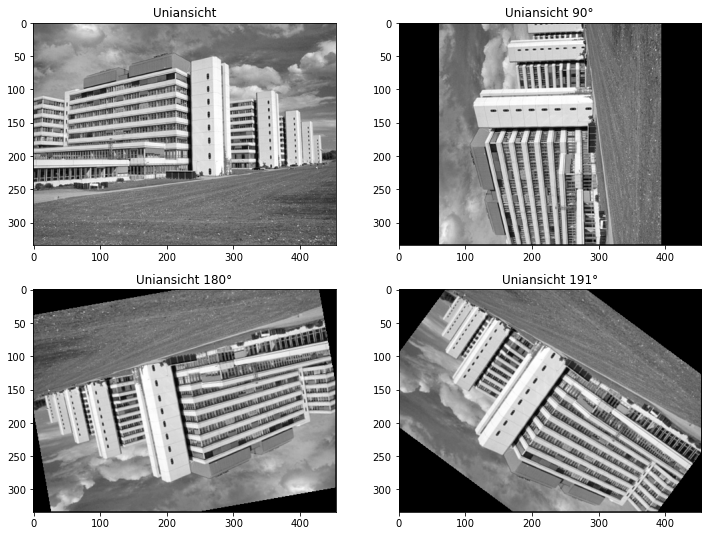

In [24]:
import math
import os
import random

import cv2 as cv
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

def rotate(img, alpha):
    # Der Typ der Bilder wird hier geändert um Overflows zu vermeiden (siehe Beispiele)
    img = img.astype(np.float)
    result = np.zeros((img.shape[:2]), np.float)
    
    def apply2DRotationMatrix(j,k):
        a = np.array([j,k])
        b = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha), np.cos(alpha)]])
        return a.dot(b)
        
    M = img.shape[0]
    N = img.shape[1]
    #iterate over all pixels
    for j_new in range(M - 1):
        for k_new in range(N - 1):
            #move of the rotation center/origin to the center of the image.
            j_centered = j_new - M/2
            k_centered = k_new - N/2
            #apply the rotation matrix and projecting the new pixel onto the old image.
            rotatedPixel = apply2DRotationMatrix(j_centered,k_centered)
            #changing the origin to the image origin in order to get the correct value
            j = rotatedPixel[0] + M/2
            k = rotatedPixel[1] + N/2
            #check if the projected pixel is in the image  
            if 0 <= j < M-1 and 0 <= k < N-1:
                #bilinear interpolation as in task 1
                jFloorDiff = (j - np.floor(j))
                kFloorDIff = (k - np.floor(k))
                jkfloored = getOldValue(img, j, k)
                fh1 = jkfloored + (getOldValue(img, j + 1, k) - jkfloored) * jFloorDiff
                jkAdd1floored = getOldValue(img, j, k + 1)
                fh2 = jkAdd1floored + (getOldValue(img, j + 1, k + 1) - jkAdd1floored) * jFloorDiff
                result[j_new,k_new] = fh1 + (fh2 - fh1) * kFloorDIff

    return result.astype(np.uint8)

def getOldValue(img, j, k):
    return img[int(np.floor(j)), int(np.floor(k))]
    
def degree_to_radians(degree):
    return math.pi * degree / 180

dir_resources = '../resources'
img = cv.imread(os.path.join(dir_resources, 'Uniansicht.jpg'), cv.IMREAD_GRAYSCALE)
random_degree = random.randint(1, 359)

fig, axs = plt.subplots(2, 2, figsize = (12, 9))
_ = axs[0, 0].imshow(img, cmap='gray')
_ = axs[0, 0].set_title('Uniansicht')
_ = axs[0, 1].imshow(rotate(img, degree_to_radians(90)), cmap='gray')
_ = axs[0, 1].set_title('Uniansicht 90°')
_ = axs[1, 0].imshow(rotate(img, degree_to_radians(190)), cmap='gray')
_ = axs[1, 0].set_title('Uniansicht 180°')
_ = axs[1, 1].imshow(rotate(img, random_degree), cmap='gray')
_ = axs[1, 1].set_title(f'Uniansicht {random_degree}°')

#### Hinweise:

* Gehen Sie wie bei der Größennormierung vor. Projezieren Sie die Ganzzahligen Pixel des Ergebnisbildes in das Ursprungsbild und berechnen Sie die Pixelintensität über bilineare Interpolation.
* Können Pixel nach der Pojektion in die Koordinaten des Ursprungsbildes außerhalb des Bildes liegen?